Question 3:

The theoretical line from question 1 represents the exact linear relationship between X and Y based on the set parameters. If the model is Y = 2 + 0.5X then the line will that exact formula. It is the ideal model without any random error. The fitted line is what you get when you apply the simple linear regression model to the data. 

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.472
Model:                            OLS   Adj. R-squared:                  0.467
Method:                 Least Squares   F-statistic:                     87.78
Date:                Fri, 08 Nov 2024   Prob (F-statistic):           2.84e-15
Time:                        04:22:20   Log-Likelihood:                -182.06
No. Observations:                 100   AIC:                             368.1
Df Residuals:                      98   BIC:                             373.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.3332      0.290      8.047      0.0

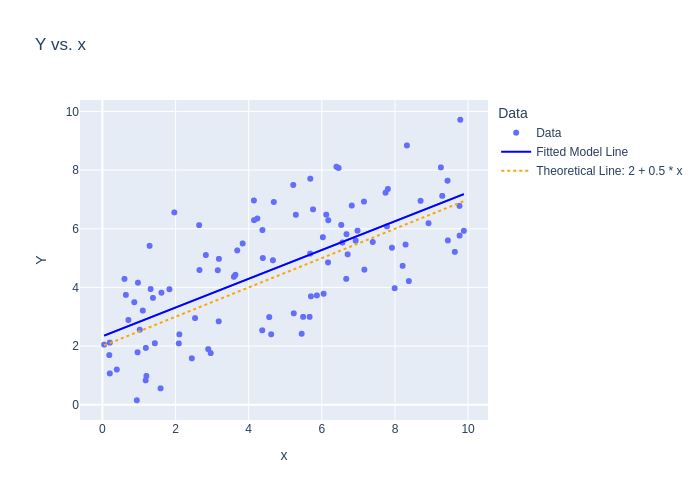

In [3]:
import numpy as np
import pandas as pd
import plotly.express as px
import statsmodels.formula.api as smf

# Simulate data
n = 100
beta0 = 2
beta1 = 0.5
sigma = 1.5
np.random.seed(0)
X = np.random.uniform(0, 10, n)
epsilon = np.random.normal(0, sigma, n)
Y = beta0 + beta1 * X + epsilon

# Create DataFrame
df = pd.DataFrame({'x': X, 'Y': Y})

# Specify and fit the model
model_data_specification = smf.ols("Y ~ x", data=df)
fitted_model = model_data_specification.fit()

# Display model summary information
print(fitted_model.summary())
print(fitted_model.summary().tables[1])
print(fitted_model.params)
print(fitted_model.params.values)
print(fitted_model.rsquared)

# Plotting with plotly.express
df['Data'] = 'Data'  # Label for legend
fig = px.scatter(df, x='x', y='Y', color='Data', trendline='ols', title='Y vs. x')

# Adding the fitted model's line
fig.add_scatter(x=df['x'], y=fitted_model.fittedvalues, line=dict(color='blue'), name="Fitted Model Line")

# Adding the theoretical line (original line without noise)
x_range = np.array([df['x'].min(), df['x'].max()])
y_line = beta0 + beta1 * x_range
fig.add_scatter(x=x_range, y=y_line, mode='lines', name="Theoretical Line: " + str(beta0) + " + " + str(beta1) + " * x", 
                line=dict(dash='dot', color='orange'))

fig.show(renderer="png")


Question 4

In sample predictions ($\hat{y}_i$) are based on the fitted intercept ($\hat{\beta}_0$) and slope ($\hat{\beta}_1$) rather than the theoretical intercept (${\beta}_0$) and slope (${\beta}_1$). This means that fitted_model.fittedvalues is based on fitted_model.params.values.

In [1]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf

# Parameters for the model
n = 100
beta0 = 2
beta1 = 0.5
sigma = 1.5
np.random.seed(0)
X = np.random.uniform(0, 10, n)
epsilon = np.random.normal(0, sigma, n)
Y = beta0 + beta1 * X + epsilon

# Create DataFrame
df = pd.DataFrame({'x': X, 'Y': Y})

# Specify and fit the model
model_data_specification = smf.ols("Y ~ x", data=df)
fitted_model = model_data_specification.fit()

# Estimated coefficients
intercept_hat = fitted_model.params['Intercept']
slope_hat = fitted_model.params['x']

# Compute fitted values manually
fitted_values_manual = intercept_hat + slope_hat * df['x']

# Compare with fitted_model.fittedvalues
print("First 5 Fitted Values (Manual Calculation):\n", fitted_values_manual.head())
print("\nFirst 5 Fitted Values (fitted_model.fittedvalues):\n", fitted_model.fittedvalues.head())


First 5 Fitted Values (Manual Calculation):
 0    5.025378
1    5.841518
2    5.290024
3    5.006098
4    4.411424
Name: x, dtype: float64

First 5 Fitted Values (fitted_model.fittedvalues):
 0    5.025378
1    5.841518
2    5.290024
3    5.006098
4    4.411424
dtype: float64


Question 8

In [3]:
import seaborn as sns
import statsmodels.formula.api as smf

# The "Classic" Old Faithful Geyser dataset
old_faithful = sns.load_dataset('geyser')

linear_for_specification = 'duration ~ waiting'
model = smf.ols(linear_for_specification, data=old_faithful)
fitted_model = model.fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               duration   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     1162.
Date:                Fri, 08 Nov 2024   Prob (F-statistic):          8.13e-100
Time:                        18:19:50   Log-Likelihood:                -194.51
No. Observations:                 272   AIC:                             393.0
Df Residuals:                     270   BIC:                             400.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.8740      0.160    -11.702      0.000      -2.189      -1.559
waiting        0.0756      0.002     34.089      0.000       0.071       0.080
==============================================================================
Omnibus:                        4.133   Durbin-Watson:                   2.561
Prob(Omnibus):                  0.127   Jarque-Bera (JB):                3.173
Skew:                          -0.138   Prob(JB):                        0.205
Kurtosis:                       2.548   Cond. No.                         384.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Question 9

There is evidence against the null hypothesis of there being no linear association between waiting time and eruption duration for short wait times if the p-value for 'waiting' in the following code is less than 0.05. This means we can conclude that there is evidence of a linear relationship between waiting time and duration, even within short wait times. However if the p-value is greater than 0.05, then we would conclude that there is no significant evidence of a relationship between waiting time and duration within short wait times. Which means that the previously observed relationship may only happpen during longer waiting times.

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6401      0.309      5.306      0.000       1.025       2.255
waiting        0.0069      0.006      1.188      0.238      -0.005       0.019


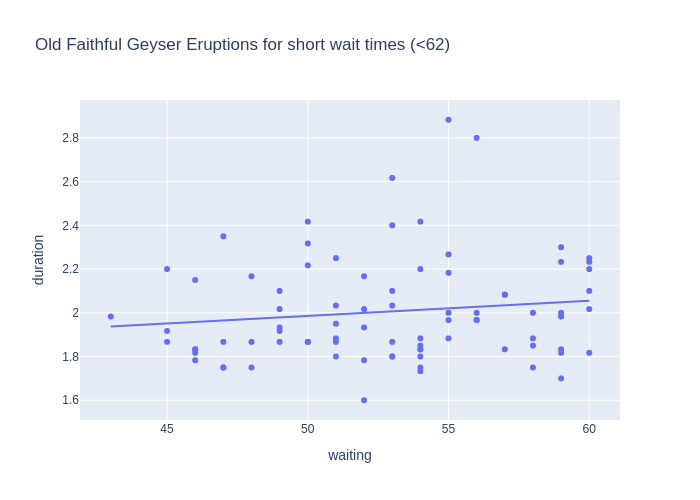

In [7]:
import plotly.express as px
import statsmodels.formula.api as smf

# Define short wait limits and restrict the dataset
short_wait_limit = 62  # Change this to 64 or 66 as needed
short_wait = old_faithful.waiting < short_wait_limit

# Fit the model to the restricted data and display the summary
model = smf.ols('duration ~ waiting', data=old_faithful[short_wait])
fitted_model = model.fit()
print(fitted_model.summary().tables[1])

# Create a scatter plot with a linear regression trendline
fig = px.scatter(old_faithful[short_wait], x='waiting', y='duration', 
                 title=f"Old Faithful Geyser Eruptions for short wait times (<{short_wait_limit})", 
                 trendline='ols')

fig.show(renderer="png")  # For GitHub and MarkUs submissions


Question 11

The main difference between the previous model and the new model is that the previous model treated wait time as a continuous variable and estimates a continuous linear relationship between waiting and duration, while the new model treats wait time as a categorical (binary) variable by creating two distinct groups: "short" (less than 68 minutes) and "long" (68 minutes or more). This means we get an average difference in eruption duration between the two categories rather than assessing the overall linear trend in the full dataset. This distinction can be valuable depending on the research question: if we’re interested in incremental changes, a continuous model is appropriate; if we’re more interested in distinct differences between short and long waits, a categorical model provides a clearer answer.

If there is evidence against the null hypothesis for the new model this means that there is a statistically significant difference in average eruption duration between "short" and "long" wait times. We would conclude that, on average, eruption duration differs between the two groups. This supports the idea that wait times may influence eruption duration in a distinct, non-linear way between these two categories.

In [8]:
import statsmodels.formula.api as smf
from IPython.display import display

# Fit the model using the indicator variable for "kind"
model = smf.ols('duration ~ C(kind, Treatment(reference="short"))', data=old_faithful)
fitted_model = model.fit()

# Display the summary table for the model
display(fitted_model.summary().tables[1])


,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,2.0943,0.041,50.752,0.000,2.013,2.176
"C(kind, Treatment(reference=""short""))[T.long]",2.2036,0.052,42.464,0.000,2.101,2.306


Summary of Conversation

Here’s a summary of our full conversation:

Theoretical and Fitted Simple Linear Regression Models:

We explored the theoretical Simple Linear Regression (SLR) model, breaking down components like predictor and outcome variables, slope and intercept coefficients, and the error term.
Using simulated data, we visualized the theoretical line and the fitted model line. This illustrated how random sampling variation influences the fitted line, causing it to vary around the true line.
Comparison of Theoretical and Fitted Values:

We demonstrated how fitted values are derived from estimated parameters using statsmodels. We compared these to the theoretical model, highlighting that fitted values represent in-sample predictions based on estimated coefficients.
Null Hypothesis Testing:

Using the Old Faithful Geyser dataset, we defined and tested a null hypothesis of "no linear association" between waiting time and eruption duration.
We assessed evidence against this null hypothesis by examining the slope coefficient's significance and p-value.
Subset Analysis:

Focusing on short wait times (using limits like 62, 64, and 66 minutes), we examined if a relationship existed between wait time and duration within shorter intervals. This showed if the previously observed association persisted in restricted ranges.
Bootstrap Sampling and Null Hypothesis Simulation:

For long wait times, we generated bootstrapped sampling distributions of slope coefficients and simulated a null distribution using specified parameters. We calculated a 95% confidence interval and p-value to assess if zero fell within the interval, indicating the absence of a significant association under the null hypothesis.
Indicator Variable Model for Short vs. Long Wait Times:

We redefined "short" and "long" wait times (using a threshold of 68 minutes) and used an indicator variable model to compare mean eruption durations across these groups.
This model contrasted with previous continuous-variable models by comparing categorical group differences rather than a continuous relationship.
We interpreted the indicator variable's coefficient and p-value to test the null hypothesis of "no difference between groups on average."
Big Picture Comparison:

We discussed the differences between treating wait time as a continuous variable (previous models) versus a categorical indicator (new model). The indicator variable model simplifies interpretation by assessing group differences, while continuous models focus on a consistent linear effect of wait time on duration.
In sum, the conversation progressively examined different methods to analyze and interpret relationships in the Old Faithful dataset, from continuous trends to categorical group comparisons, using both statistical testing and visualization. This approach highlighted how modeling choices impact the interpretation of data.

https://chatgpt.com/share/672e5bc9-b0d0-8004-bc26-d34d7c3e6cbe